In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\laksh\Downloads\Boxify Dataset - Data Analyst Bootcamp.csv")


In [3]:
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [4]:
data.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [5]:
data = data.drop_duplicates()

In [6]:
data = data.dropna()

In [7]:
print(data.columns)

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')


In [8]:
# Handling missing values (e.g., filling with mean, mode, or removing)
data['PriceReg'].fillna(data['PriceReg'].mean(), inplace=True)
data['SoldCount'].fillna(0, inplace=True)  # Assuming SoldCount missing values as zero
data.dropna(subset=['SKU_number', 'Order'], inplace=True)

C:\Users\laksh\AppData\Local\Temp\ipykernel_3168\3135550010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PriceReg'].fillna(data['PriceReg'].mean(), inplace=True)
C:\Users\laksh\AppData\Local\Temp\ipykernel_3168\3135550010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

C:\Users\laksh\AppData\Local\Temp\ipykernel_3168\1582703230.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='ReleaseYear', y='SoldCount', ci=None)


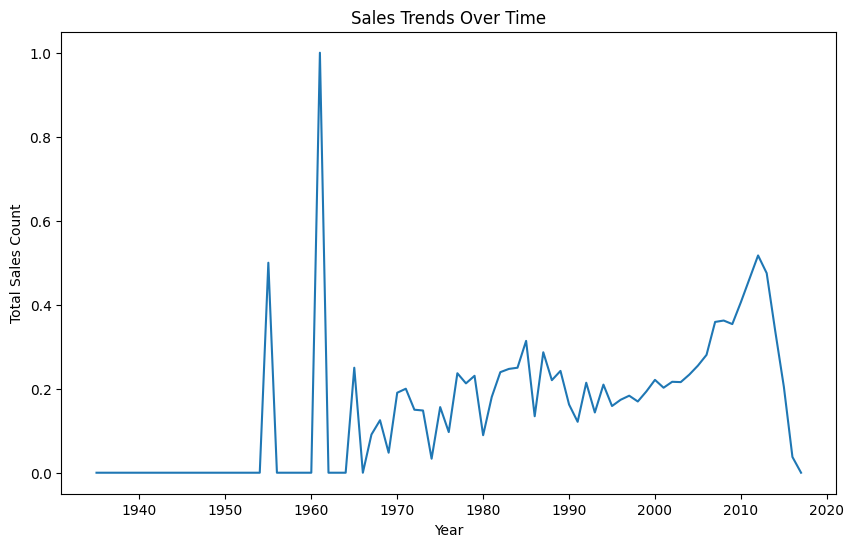

In [9]:
# Analyzing sales trends over time
data['ReleaseYear'] = pd.to_datetime(data['ReleaseYear'], format='%Y')

# Plotting sales trends by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='ReleaseYear', y='SoldCount', ci=None)
plt.title('Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales Count')
plt.show()


In [10]:
# Identify top-selling products and categories
top_selling_products = data.groupby('SKU_number')['SoldCount'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='SoldCount', ascending=False)

In [11]:
# Investigate low-stock items
low_stock_items = data[data['ItemCount'] < 5]  # Assuming a threshold of 5 for low stock
print("Low Stock Items:")
print(low_stock_items[['SKU_number', 'ItemCount']])

Low Stock Items:
       SKU_number  ItemCount
797        521116          2
1278      1772999          3
1562      2884280          1
1600      3142703          2
2336      3951290          4
...           ...        ...
75402     3230816          0
75403     3230814          0
75404     3230815          0
75467     3474212          0
75704     2287680          0

[210 rows x 2 columns]


In [12]:
# Calculate Inventory Turnover (Sales / Average Inventory)
data['InventoryTurnover'] = data['SoldCount'] / (data['ItemCount'].replace(0, np.nan).mean())

# Calculate Stock-to-Sales Ratio (Stock at hand / Total Sales)
data['StockToSalesRatio'] = data['ItemCount'] / data['SoldCount'].replace(0, np.nan)

# Determine Reorder Points (Example: Average Demand * Lead Time)
lead_time = 7  # Assuming lead time is 7 days
average_demand = data['SoldCount'].mean()
data['ReorderPoint'] = average_demand * lead_time

In [13]:
# Provide actionable recommendations
print("Actionable Recommendations for Inventory Management:")
print("1. Reorder products with Inventory Turnover less than 1.")
print("2. Monitor products with high Stock-to-Sales Ratio for overstocking.")
print("3. Set reorder points based on average demand and lead time.")

Actionable Recommendations for Inventory Management:
1. Reorder products with Inventory Turnover less than 1.
2. Monitor products with high Stock-to-Sales Ratio for overstocking.
3. Set reorder points based on average demand and lead time.


C:\Users\laksh\AppData\Local\Temp\ipykernel_3168\2773285760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_selling_products.head(10), x='SKU_number', y='SoldCount', palette='viridis')


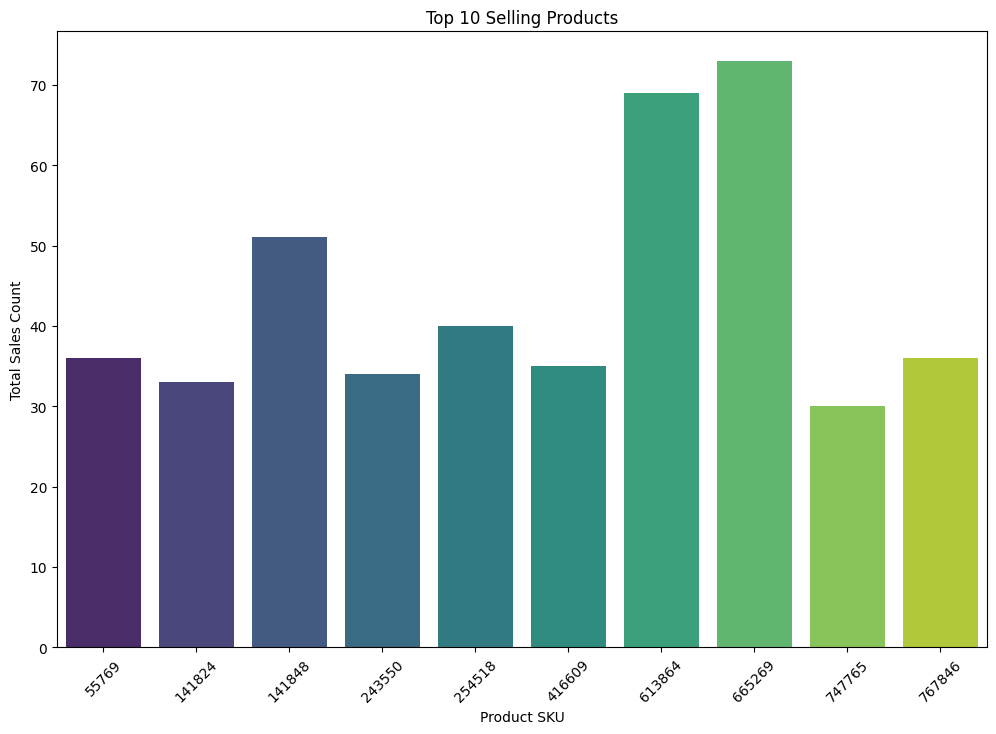

In [14]:
# Plotting top-selling products
plt.figure(figsize=(12, 8))
sns.barplot(data=top_selling_products.head(10), x='SKU_number', y='SoldCount', palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Product SKU')
plt.ylabel('Total Sales Count')
plt.xticks(rotation=45)
plt.show()

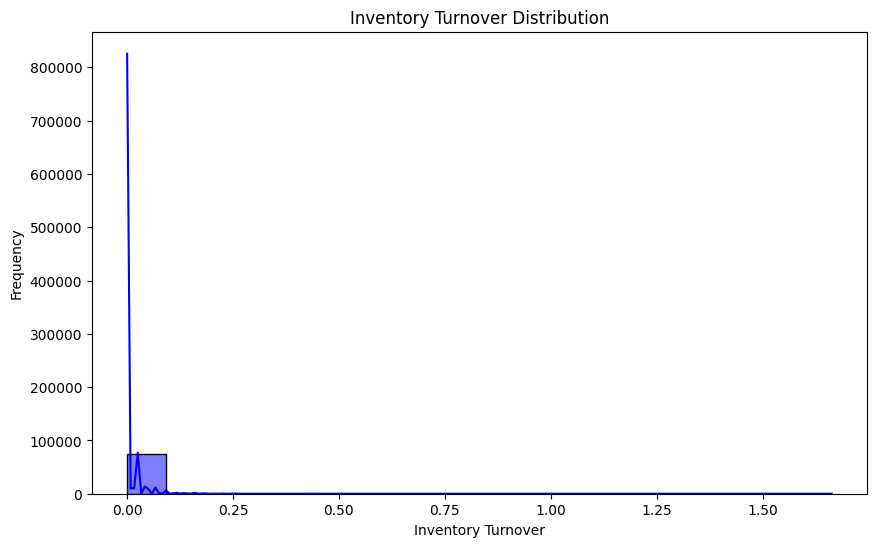

In [15]:
# Plotting Inventory Turnover
plt.figure(figsize=(10, 6))
sns.histplot(data['InventoryTurnover'], kde=True, color='blue')
plt.title('Inventory Turnover Distribution')
plt.xlabel('Inventory Turnover')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Calculate Cost of Goods Sold (COGS)
data['COGS'] = data['SoldCount'] * data['PriceReg']

In [17]:
# Calculate Average Inventory (assuming average over the period is ItemCount/2)
data['AverageInventory'] = data['ItemCount'] / 2

In [18]:
# Calculate Inventory Turnover Ratio
data['InventoryTurnoverRatio'] = data['COGS'] / data['AverageInventory']

In [19]:
# Display inventory turnover for each product
print("Inventory Turnover Ratio:")
print(data[['SKU_number', 'InventoryTurnoverRatio']])

Inventory Turnover Ratio:
       SKU_number  InventoryTurnoverRatio
0         1737127                0.000000
1         3255963                0.000000
2          612701                0.000000
3          115883               10.000000
4          863939                8.710714
...           ...                     ...
75991      863599                0.000000
75992      614304                0.000000
75993      109021                0.000000
75994      658242                0.000000
75995     2538340                0.000000

[75996 rows x 2 columns]


In [20]:
# Calculate Stock-to-Sales Ratio
data['StockToSalesRatio'] = data['ItemCount'] / data['SoldCount']

# Display Stock-to-Sales Ratio for each product
print("Stock-to-Sales Ratio:")
print(data[['SKU_number', 'StockToSalesRatio']])

Stock-to-Sales Ratio:
       SKU_number  StockToSalesRatio
0         1737127                inf
1         3255963                inf
2          612701                inf
3          115883               20.0
4          863939               28.0
...           ...                ...
75991      863599                inf
75992      614304                inf
75993      109021                inf
75994      658242                inf
75995     2538340                inf

[75996 rows x 2 columns]


In [21]:
# Assume average daily demand based on total sales divided by days in the period (365 days for simplicity)
data['AvgDailyDemand'] = data['SoldCount'] / 365

# Assume lead time in days and safety stock factor
lead_time_days = 7
safety_stock_factor = 1.2

# Calculate reorder point
data['ReorderPoint'] = (data['AvgDailyDemand'] * lead_time_days) + (data['AvgDailyDemand'] * safety_stock_factor)

# Display reorder points for each product
print("Reorder Points:")
print(data[['SKU_number', 'ReorderPoint']])

Reorder Points:
       SKU_number  ReorderPoint
0         1737127      0.000000
1         3255963      0.000000
2          612701      0.000000
3          115883      0.022466
4          863939      0.022466
...           ...           ...
75991      863599      0.000000
75992      614304      0.000000
75993      109021      0.000000
75994      658242      0.000000
75995     2538340      0.000000

[75996 rows x 2 columns]
